## This notebook test functions to compute metrics in process.py

In [1]:
import sys, os
sys.path.insert(1, os.getcwd() + '\..\src')
sys.path.insert(1, os.getcwd() + '/../src')
sys.path.insert(1, os.getcwd() + '\..\data')
sys.path.insert(1, os.getcwd() + '/../data')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from process import *
from viz import *

In [3]:
try:
    input_df = pd.read_csv('..\data\Sessions2_20221020.csv')
except:
    input_df = pd.read_csv('../data/Sessions2_20221020.csv')

In [4]:
input_df.head()

,dcosId,userId,vehicle_model,vehicle_maxChgRate_W,siteId,stationId,connectTime,startChargeTime,Deadline,energyReq_Wh,...,sch_centsPerOverstayHr,Duration,DurationHrs,choice,regular,scheduled,cumEnergy_Wh,peakPower_W,power,lastUpdate
0,24,605,500e,6600,23,7,2020-11-05T10:30:16,2020-11-05T10:31:09,NaN,NaN,...,200.0,0 days 03:43:57,3.73249,REGULAR,1,0,3281.0,6335,"[{'power_W': Decimal('6259'), 'timestamp': Dec...",2020-11-05T14:15:06
1,26,486,Model 3,24000,23,3,2020-11-11T07:39:55,2020-11-11T07:39:59,NaN,NaN,...,200.0,0 days 06:50:07,6.83527,REGULAR,1,0,33458.0,7005,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-11T14:30:06
2,30,620,Volt,3600,25,12,2020-11-13T16:19:55,2020-11-13T16:20:06,2020-11-14T04:15:00,18400.0,...,300.0,0 days 20:40:02,20.66722,SCHEDULED,0,1,15216.0,3450,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-14T13:00:08
3,31,618,Bolt,7200,23,6,2020-11-14T23:47:06,2020-11-14T23:47:16,NaN,NaN,...,400.0,0 days 02:12:51,2.21416,REGULAR,1,0,14378.0,6889,"[{'power_W': Decimal('6889'), 'timestamp': Dec...",2020-11-15T02:00:07
4,32,623,B-Class Electric Drive,6000,23,9,2020-11-16T11:38:44,2020-11-16T11:42:22,NaN,NaN,...,NaN,0 days 03:12:45,3.21249,REGULAR,1,0,12484.0,6852,"[{'power_W': Decimal('6813'), 'timestamp': Dec...",2020-11-16T14:55:07


In [5]:
input_df = compute_slack(input_df)

In [6]:
input_df.head()

,dcosId,userId,vehicle_model,vehicle_maxChgRate_W,siteId,stationId,connectTime,startChargeTime,Deadline,energyReq_Wh,...,Duration,DurationHrs,choice,regular,scheduled,cumEnergy_Wh,peakPower_W,power,lastUpdate,Slack_Hr
0,24,605,500e,6600,23,7,2020-11-05T10:30:16,2020-11-05T10:31:09,NaN,NaN,...,0 days 03:43:57,3.73249,REGULAR,1,0,3281.0,6335,"[{'power_W': Decimal('6259'), 'timestamp': Dec...",2020-11-05T14:15:06,3.235369
1,26,486,Model 3,24000,23,3,2020-11-11T07:39:55,2020-11-11T07:39:59,NaN,NaN,...,0 days 06:50:07,6.83527,REGULAR,1,0,33458.0,7005,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-11T14:30:06,5.441187
2,30,620,Volt,3600,25,12,2020-11-13T16:19:55,2020-11-13T16:20:06,2020-11-14T04:15:00,18400.0,...,0 days 20:40:02,20.66722,SCHEDULED,0,1,15216.0,3450,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-14T13:00:08,16.440553
3,31,618,Bolt,7200,23,6,2020-11-14T23:47:06,2020-11-14T23:47:16,NaN,NaN,...,0 days 02:12:51,2.21416,REGULAR,1,0,14378.0,6889,"[{'power_W': Decimal('6889'), 'timestamp': Dec...",2020-11-15T02:00:07,0.217216
4,32,623,B-Class Electric Drive,6000,23,9,2020-11-16T11:38:44,2020-11-16T11:42:22,NaN,NaN,...,0 days 03:12:45,3.21249,REGULAR,1,0,12484.0,6852,"[{'power_W': Decimal('6813'), 'timestamp': Dec...",2020-11-16T14:55:07,1.131823


## Compute daily revenue

<AxesSubplot: xlabel='Slack_Hr', ylabel='Count'>

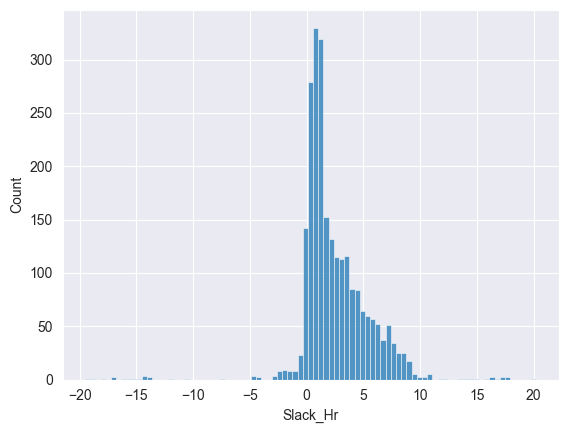

In [7]:
sns.histplot(data=input_df, x="Slack_Hr")

In [8]:
daily_revenue = compute_revenue(input_df, interval='day')

/var/folders/rn/6p4_n9750412mw__zxkgbzcm0000gn/T/ipykernel_38807/314777307.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  sns.barplot(data=daily_revenue.reset_index()[daily_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(50, "day"))], x="connectTime", y="estCost")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2022-10-07T00:00:00.000000000'),
  Text(1, 0, '2022-10-08T00:00:00.000000000'),
  Text(2, 0, '2022-10-09T00:00:00.000000000'),
  Text(3, 0, '2022-10-10T00:00:00.000000000'),
  Text(4, 0, '2022-10-11T00:00:00.000000000'),
  Text(5, 0, '2022-10-12T00:00:00.000000000'),
  Text(6, 0, '2022-10-13T00:00:00.000000000'),
  Text(7, 0, '2022-10-14T00:00:00.000000000'),
  Text(8, 0, '2022-10-15T00:00:00.000000000'),
  Text(9, 0, '2022-10-16T00:00:00.000000000'),
  Text(10, 0, '2022-10-17T00:00:00.000000000'),
  Text(11, 0, '2022-10-18T00:00:00.000000000'),
  Text(12, 0, '2022-10-19T00:00:00.000000000'),
  Text(13, 0, '2022-10-20T00:00:00.000000000')])

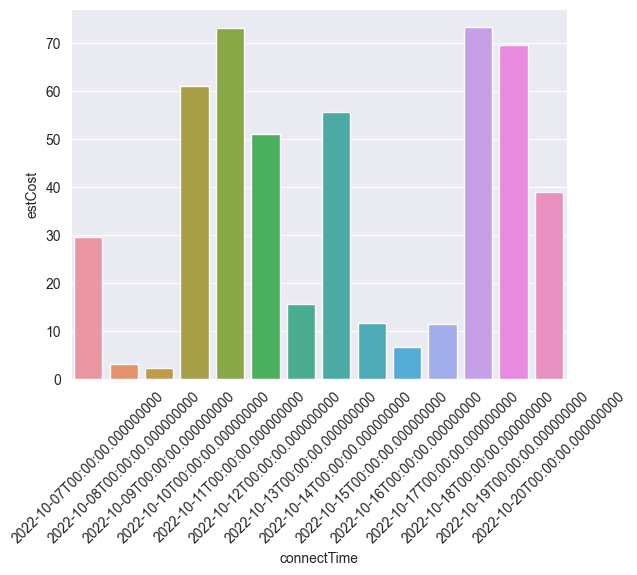

In [9]:
# plot the revenue for the past 50 days
sns.barplot(data=daily_revenue.reset_index()[daily_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(50, "day"))], x="connectTime", y="estCost")
plt.xticks(rotation=45)

In [10]:
## Compute weekly revenue

In [11]:
weekly_revenue = compute_revenue(input_df, interval='week')

/var/folders/rn/6p4_n9750412mw__zxkgbzcm0000gn/T/ipykernel_38807/3061158214.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  sns.barplot(data=weekly_revenue.reset_index()[weekly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(10, "W"))], x="connectTime", y="estCost")


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2022-09-18T00:00:00.000000000'),
  Text(1, 0, '2022-09-25T00:00:00.000000000'),
  Text(2, 0, '2022-10-02T00:00:00.000000000'),
  Text(3, 0, '2022-10-09T00:00:00.000000000'),
  Text(4, 0, '2022-10-16T00:00:00.000000000'),
  Text(5, 0, '2022-10-23T00:00:00.000000000')])

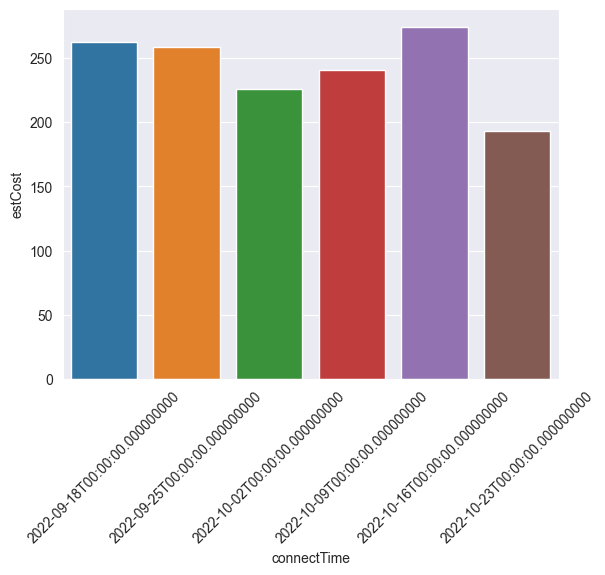

In [12]:
# plot the revenue for the past 10 weeks
sns.barplot(data=weekly_revenue.reset_index()[weekly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(10, "W"))], x="connectTime", y="estCost")
plt.xticks(rotation=45)

## Compute monthly revenue

In [13]:
monthly_revenue = compute_revenue(input_df, interval='month')

/var/folders/rn/6p4_n9750412mw__zxkgbzcm0000gn/T/ipykernel_38807/533687778.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  sns.barplot(data=monthly_revenue.reset_index()[monthly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(360, "days"))], x="connectTime", y="estCost")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2021-12-31T00:00:00.000000000'),
  Text(1, 0, '2022-01-31T00:00:00.000000000'),
  Text(2, 0, '2022-02-28T00:00:00.000000000'),
  Text(3, 0, '2022-03-31T00:00:00.000000000'),
  Text(4, 0, '2022-04-30T00:00:00.000000000'),
  Text(5, 0, '2022-05-31T00:00:00.000000000'),
  Text(6, 0, '2022-06-30T00:00:00.000000000'),
  Text(7, 0, '2022-07-31T00:00:00.000000000'),
  Text(8, 0, '2022-08-31T00:00:00.000000000'),
  Text(9, 0, '2022-09-30T00:00:00.000000000'),
  Text(10, 0, '2022-10-31T00:00:00.000000000')])

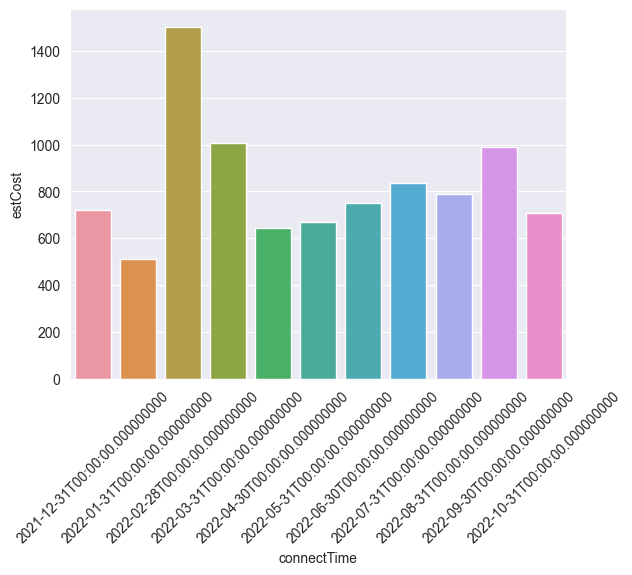

In [14]:
# plot revenue for the last year
sns.barplot(data=monthly_revenue.reset_index()[monthly_revenue.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(360, "days"))], x="connectTime", y="estCost")
plt.xticks(rotation=45)

## Compute yearly revenue

In [15]:
yearly_revenue = compute_revenue(input_df, interval='year')

(array([0, 1, 2]),
 [Text(0, 0, '2020-12-31T00:00:00.000000000'),
  Text(1, 0, '2021-12-31T00:00:00.000000000'),
  Text(2, 0, '2022-12-31T00:00:00.000000000')])

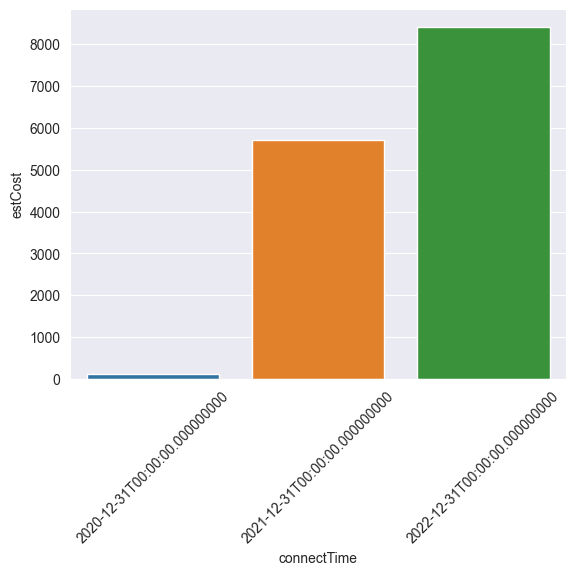

In [16]:
# plot yearly revenue
sns.barplot(data=yearly_revenue.reset_index(), x="connectTime", y="estCost")
plt.xticks(rotation=45)

## Compute utility cost

In [17]:
input_df = compute_utility_cost(input_df)

In [18]:
input_df.utility_cost

0        1.250155
1        9.392068
2        2.712457
3        2.300721
4        4.808434
          ...    
2394     2.652262
2395    11.758824
2396     1.109620
2397    11.097912
2398     4.592913
Name: utility_cost, Length: 2399, dtype: float64

Text(0, 0.5, 'count')

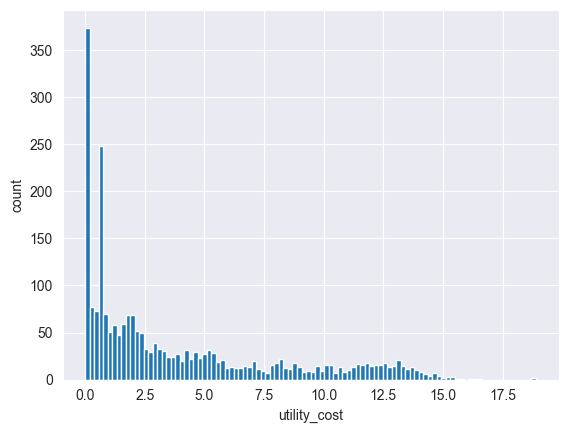

In [19]:
hist = input_df.utility_cost.hist(bins=100)
hist.set_xlabel('utility_cost')
hist.set_ylabel('count')

## Compute net income

In [20]:
input_df = compute_net_income_per_session(input_df)

In [21]:
input_df

,dcosId,userId,vehicle_model,vehicle_maxChgRate_W,siteId,stationId,connectTime,startChargeTime,Deadline,energyReq_Wh,...,choice,regular,scheduled,cumEnergy_Wh,peakPower_W,power,lastUpdate,Slack_Hr,utility_cost,net_income
0,24,605,500e,6600,23,7,2020-11-05 10:30:16,2020-11-05T10:31:09,NaN,NaN,...,REGULAR,1,0,3281.0,6335,"[{'power_W': Decimal('6259'), 'timestamp': Dec...",2020-11-05T14:15:06,3.235369,1.250155,4.102085
1,26,486,Model 3,24000,23,3,2020-11-11 07:39:55,2020-11-11T07:39:59,NaN,NaN,...,REGULAR,1,0,33458.0,7005,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-11T14:30:06,5.441187,9.392068,1.360842
2,30,620,Volt,3600,25,12,2020-11-13 16:19:55,2020-11-13T16:20:06,2020-11-14T04:15:00,18400.0,...,SCHEDULED,0,1,15216.0,3450,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2020-11-14T13:00:08,16.440553,2.712457,26.609653
3,31,618,Bolt,7200,23,6,2020-11-14 23:47:06,2020-11-14T23:47:16,NaN,NaN,...,REGULAR,1,0,14378.0,6889,"[{'power_W': Decimal('6889'), 'timestamp': Dec...",2020-11-15T02:00:07,0.217216,2.300721,1.520529
4,32,623,B-Class Electric Drive,6000,23,9,2020-11-16 11:38:44,2020-11-16T11:42:22,NaN,NaN,...,REGULAR,1,0,12484.0,6852,"[{'power_W': Decimal('6813'), 'timestamp': Dec...",2020-11-16T14:55:07,1.131823,4.808434,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,3411,964,Ioniq Electric,50000,25,18,2022-10-20 06:59:11,2022-10-20T06:59:22,NaN,NaN,...,REGULAR,1,0,16978.0,6517,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2022-10-20T09:45:07,2.422940,2.652262,1.742858
2395,3412,779,Bolt,55000,25,11,2022-10-20 08:49:07,2022-10-20T08:49:14,NaN,NaN,...,REGULAR,1,0,38108.0,6768,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2022-10-20T14:50:08,5.322117,11.758824,-3.018284
2396,3414,1135,Escape PHEV,3300,25,15,2022-10-20 08:53:54,2022-10-20T08:54:02,2022-10-20T17:00:00,8727.0,...,SCHEDULED,0,1,4959.0,3371,"[{'power_W': Decimal('0'), 'timestamp': Decima...",2022-10-20T14:50:08,4.432263,1.109620,9.676670
2397,3415,1139,Model Y,7000,25,13,2022-10-20 09:10:26,2022-10-20T09:11:43,NaN,NaN,...,REGULAR,1,0,34679.0,6492,"[{'power_W': Decimal('6445'), 'timestamp': Dec...",2022-10-20T14:50:08,0.686127,11.097912,-2.870732


/var/folders/rn/6p4_n9750412mw__zxkgbzcm0000gn/T/ipykernel_38807/1394457510.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  monthly_net_income.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(360, "days"))],


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2021-12-31T00:00:00.000000000'),
  Text(1, 0, '2022-01-31T00:00:00.000000000'),
  Text(2, 0, '2022-02-28T00:00:00.000000000'),
  Text(3, 0, '2022-03-31T00:00:00.000000000'),
  Text(4, 0, '2022-04-30T00:00:00.000000000'),
  Text(5, 0, '2022-05-31T00:00:00.000000000'),
  Text(6, 0, '2022-06-30T00:00:00.000000000'),
  Text(7, 0, '2022-07-31T00:00:00.000000000'),
  Text(8, 0, '2022-08-31T00:00:00.000000000'),
  Text(9, 0, '2022-09-30T00:00:00.000000000'),
  Text(10, 0, '2022-10-31T00:00:00.000000000')])

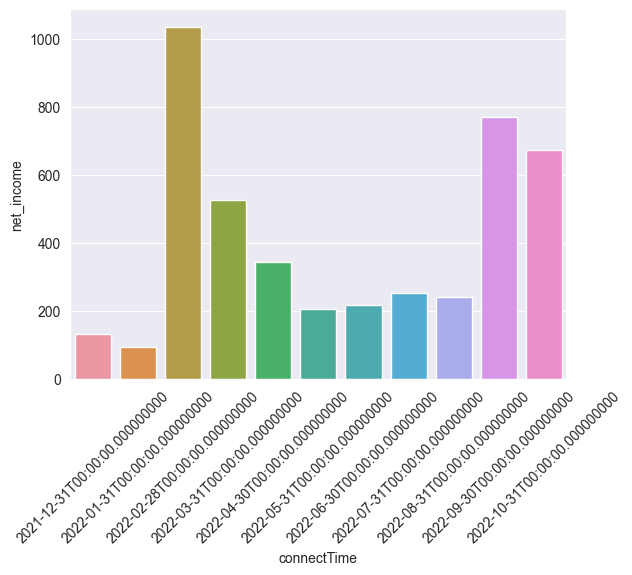

In [22]:
monthly_net_income = compute_net_income(input_df, interval='month')
# plot revenue for the last year
sns.barplot(data=monthly_net_income.reset_index()[
    monthly_net_income.reset_index()['connectTime'] > (pd.to_datetime("now") - pd.Timedelta(360, "days"))],
            x="connectTime", y="net_income")
plt.xticks(rotation=45)

# Visualize Charging Profile

<AxesSubplot: xlabel='timestamp'>

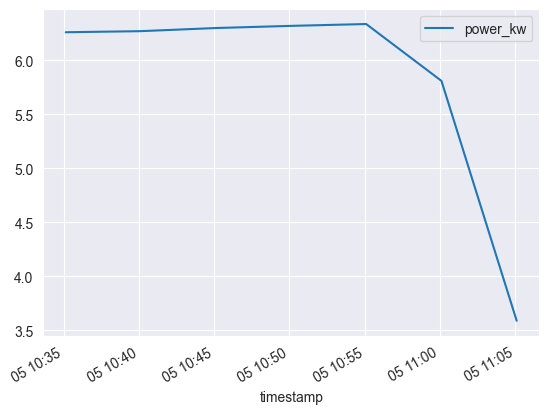

In [23]:
viz_charging_profile(input_df.iloc[0])